# Importing Packages

In [1]:
#### Import Modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import pylab 
%matplotlib inline

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reading Data

In [2]:
df = pd.read_excel("data/HousingPrice.xls")
df.head()

,Order,PID,MS Zoning,Lot Area,Lot Shape,Utilities,Condition 1,Condition 2,Bldg Type,House Style,...,Year Built,Year Remod/Add,Foundation,Bsmt Qual,Central Air,F_Flr,S_Flr,Kitchen Qual,Yr Sold,Sale_Price
0,1,526301100,RL,31770,IR1,AllPub,Norm,Norm,1Fam,1Story,...,1960,1960,CBlock,TA,Y,1656,0,TA,2010,215000
1,2,526350040,RH,11622,Reg,AllPub,Feedr,Norm,1Fam,1Story,...,1961,1961,CBlock,TA,Y,896,0,TA,2010,105000
2,3,526351010,RL,14267,IR1,AllPub,Norm,Norm,1Fam,1Story,...,1958,1958,CBlock,TA,Y,1329,0,Gd,2010,172000
3,4,526353030,RL,11160,Reg,AllPub,Norm,Norm,1Fam,1Story,...,1968,1968,CBlock,TA,Y,2110,0,Ex,2010,244000
4,5,527105010,RL,13830,IR1,AllPub,Norm,Norm,1Fam,2Story,...,1997,1998,PConc,Gd,Y,928,701,TA,2010,189900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
Order             2930 non-null int64
PID               2930 non-null int64
MS Zoning         2930 non-null object
Lot Area          2930 non-null int64
Lot Shape         2930 non-null object
Utilities         2930 non-null object
Condition 1       2930 non-null object
Condition 2       2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Foundation        2930 non-null object
Bsmt Qual         2850 non-null object
Central Air       2930 non-null object
F_Flr             2930 non-null int64
S_Flr             2930 non-null int64
Kitchen Qual      2930 non-null object
Yr Sold           2930 non-null int64
Sale_Price        2930 non-null int64
dtypes: int64(11), object(11)
memory usage: 50

In [4]:
df.columns

Index(['Order', 'PID', 'MS Zoning', 'Lot Area', 'Lot Shape', 'Utilities',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Foundation', 'Bsmt Qual', 'Central Air', 'F_Flr', 'S_Flr',
       'Kitchen Qual', 'Yr Sold', 'Sale_Price'],
      dtype='object')

##### Fixing Column Names

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace(')', '')
df.columns

Index(['order', 'pid', 'ms_zoning', 'lot_area', 'lot_shape', 'utilities',
       'condition_1', 'condition_2', 'bldg_type', 'house_style',
       'overall_qual', 'overall_cond', 'year_built', 'year_remod_add',
       'foundation', 'bsmt_qual', 'central_air', 'f_flr', 's_flr',
       'kitchen_qual', 'yr_sold', 'sale_price'],
      dtype='object')

In [6]:
df.set_index('pid', inplace=True)  ### Setting Index 
df.drop('order', axis =1, inplace=True) ### Dropping Unneccessary column

In [7]:
df.describe()

,lot_area,overall_qual,overall_cond,year_built,year_remod_add,f_flr,s_flr,yr_sold,sale_price
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,10147.921843,6.094881,5.563140,1971.356314,1984.266553,1159.557679,335.455973,2007.790444,180796.060068
std,7880.017759,1.411026,1.111537,30.245361,20.860286,391.890885,428.395715,1.316613,79886.692357
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,2006.000000,12789.000000
25%,7440.250000,5.000000,5.000000,1954.000000,1965.000000,876.250000,0.000000,2007.000000,129500.000000
50%,9436.500000,6.000000,5.000000,1973.000000,1993.000000,1084.000000,0.000000,2008.000000,160000.000000
75%,11555.250000,7.000000,6.000000,2001.000000,2004.000000,1384.000000,703.750000,2009.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,2010.000000,755000.000000


## Step1 - Treatment of Continous Variables

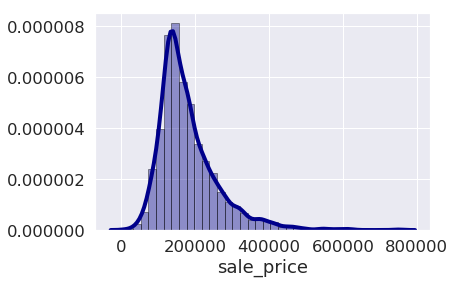

In [8]:
# Density Plot and Histogram of Target Variable
sns.distplot(df.sale_price, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [9]:
numeric_cols = df.select_dtypes(np.number).columns

In [10]:
df_numeric = df[numeric_cols]

In [12]:
def des_stat(df, pred=None): 
    obs = df.shape[0]
    counts = df.apply(lambda x: x.count())
    distincts = df.apply(lambda x: x.unique().shape[0])
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ratio = (df.isnull().sum()/ obs) * 100
    
    mean_value = np.round(df.mean(),2)
    median_value = df.median()
    
    std_value = np.round(df.std(),2)
    min_value = df.min()
    max_value = df.max()
    
    skewness = np.round(df.skew(),2)
    kurtosis = np.round(df.kurt(),2) 
    
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['counts', 'distincts', 'nulls', 'missing ratio', 'mean_value', 
                'median_value', 'min_value',  'max_value', 'std_value', 'skewness', 'kurtosis']
        str = pd.concat([counts, distincts, nulls, missing_ratio, mean_value, median_value, 
                         min_value, max_value, std_value, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        string = pd.concat([counts, distincts, nulls, missing_ratio, mean_value, median_value, 
                         min_value, max_value, std_value, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr_'  + pred
        cols = ['counts', 'distincts', 'nulls', 'missing ratio', 'mean_value', 'median_value', 
                'min_value', 'max_value', 'std_value', 'skewness', 'kurtosis', corr_col ]
    string.columns = cols
    print('___________________________')
    return string

In [20]:
details = des_stat(df_numeric, 'sale_price')
display(details.sort_values(by='corr_sale_price', ascending=False))

Data shape: (2930, 9)
___________________________


,counts,distincts,nulls,missing ratio,mean_value,median_value,min_value,max_value,std_value,skewness,kurtosis,corr_sale_price
lot_area,2930,1960,0,0.0,10147.92,9436.5,1300,215245,7880.02,12.82,265.02,0.266549
overall_qual,2930,10,0,0.0,6.09,6.0,1,10,1.41,0.19,0.05,0.799262
overall_cond,2930,9,0,0.0,5.56,5.0,1,9,1.11,0.57,1.49,-0.101697
year_built,2930,118,0,0.0,1971.36,1973.0,1872,2010,30.25,-0.60,-0.50,0.558426
year_remod_add,2930,61,0,0.0,1984.27,1993.0,1950,2010,20.86,-0.45,-1.34,0.532974


In [14]:
### Year sold is not Continous so make it as Category
df['yr_sold'] = df.yr_sold.astype('object')

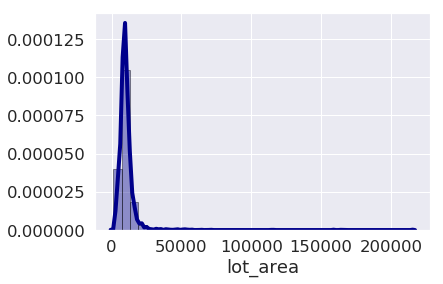

In [15]:
# Density Plot and Histogram of Lot Area
sns.distplot(df.lot_area, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

## Correlation Between Continous Variables

In [16]:
df.select_dtypes(np.number).corr().sort_values(by = 'sale_price', ascending =False)

,lot_area,overall_qual,overall_cond,year_built,year_remod_add,f_flr,s_flr,sale_price
sale_price,0.266549,0.799262,-0.101697,0.558426,0.532974,0.621676,0.269373,1.000000
overall_qual,0.097188,1.000000,-0.094812,0.597027,0.569609,0.477837,0.241402,0.799262
f_flr,0.332235,0.477837,-0.157052,0.310463,0.242108,1.000000,-0.250057,0.621676
year_built,0.023258,0.597027,-0.368773,1.000000,0.612095,0.310463,0.016828,0.558426
year_remod_add,0.021682,0.569609,0.047680,0.612095,1.000000,0.242108,0.158939,0.532974
s_flr,0.032996,0.241402,0.006218,0.016828,0.158939,-0.250057,1.000000,0.269373
lot_area,1.000000,0.097188,-0.034759,0.023258,0.021682,0.332235,0.032996,0.266549
overall_cond,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.157052,0.006218,-0.101697


##### Outlier Removal for Lot Area

In [21]:
q75, q25 = np.percentile(df.lot_area, [75,25])
iqr = q75 - q25
upper_whisker = q75 + 1.5 * iqr
lower_whisker = q25 - 1.5 * iqr
def check(x, ul, ll):
    if ul>=x>=ll:
        return x

In [22]:
df.lot_area.mean()

10147.921843003413

In [23]:
print("Percentage of Outliers in tripduration:",len(df[df.lot_area.apply(check, args = (upper_whisker, lower_whisker)).isnull()]['lot_area'])/len(df) * 100)

Percentage of Outliers in tripduration: 4.334470989761092


In [24]:
mean_lot_area = df[df.lot_area.apply(check, args = (upper_whisker, lower_whisker)).notnull()]['lot_area'].mean()
print (mean_lot_area)

9189.286835533358


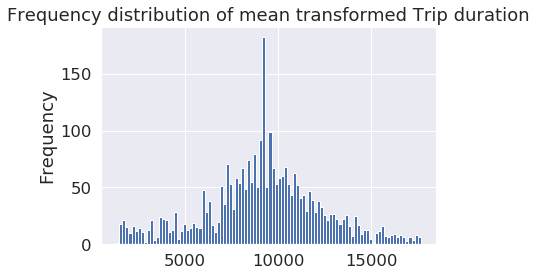

In [25]:
def transform_lot_area(x):
    if x > upper_whisker:
        return mean_lot_area
    return x

df['lot_area_mean'] = df['lot_area'].apply(lambda x: transform_lot_area(x))
df['lot_area_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration');

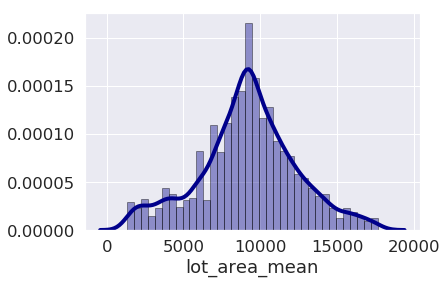

In [26]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df.lot_area_mean, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [27]:
df.corr()['sale_price'].sort_values(ascending =False)

sale_price        1.000000
overall_qual      0.799262
f_flr             0.621676
year_built        0.558426
year_remod_add    0.532974
lot_area_mean     0.394259
s_flr             0.269373
lot_area          0.266549
overall_cond     -0.101697
Name: sale_price, dtype: float64

### Can Lot area corr with Sales cab be improved?

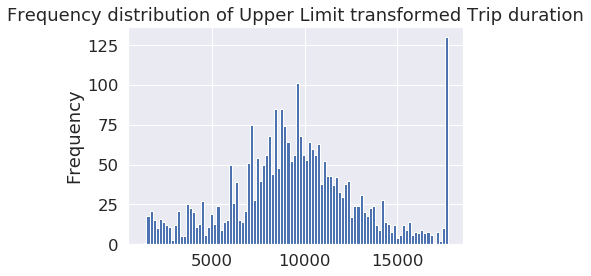

In [28]:
def transform_lot_area(x):
    if x > upper_whisker:
        return upper_whisker
    return x

df['lot_area_upper'] = df['lot_area'].apply(lambda x: transform_lot_area(x))
df['lot_area_upper'].plot.hist(bins=100, title='Frequency distribution of Upper Limit transformed Trip duration');

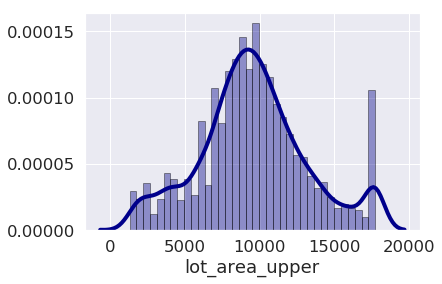

In [29]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df.lot_area_upper, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [30]:
df.corr()['sale_price'].sort_values(ascending =False)

sale_price        1.000000
overall_qual      0.799262
f_flr             0.621676
year_built        0.558426
year_remod_add    0.532974
lot_area_upper    0.412271
lot_area_mean     0.394259
s_flr             0.269373
lot_area          0.266549
overall_cond     -0.101697
Name: sale_price, dtype: float64

In [31]:
df['first_second_flr'] = df.f_flr + df.s_flr
df.corr()['sale_price'].sort_values(ascending =False)

sale_price          1.000000
overall_qual        0.799262
first_second_flr    0.713588
f_flr               0.621676
year_built          0.558426
year_remod_add      0.532974
lot_area_upper      0.412271
lot_area_mean       0.394259
s_flr               0.269373
lot_area            0.266549
overall_cond       -0.101697
Name: sale_price, dtype: float64

In [32]:
#### Dropping Low Correlation and unneccessary columns
df.drop(['lot_area', 'overall_cond', 'f_flr', 's_flr', 'lot_area_mean'], axis=1, inplace=True)

In [33]:
df.corr()['sale_price'].sort_values(ascending =False)

sale_price          1.000000
overall_qual        0.799262
first_second_flr    0.713588
year_built          0.558426
year_remod_add      0.532974
lot_area_upper      0.412271
Name: sale_price, dtype: float64

# Step-2 Treatment of Nominal/Categorical Variables

In [34]:
df.select_dtypes('object').columns

Index(['ms_zoning', 'lot_shape', 'utilities', 'condition_1', 'condition_2',
       'bldg_type', 'house_style', 'foundation', 'bsmt_qual', 'central_air',
       'kitchen_qual', 'yr_sold'],
      dtype='object')

In [35]:
pd.factorize(df.central_air)

(array([0, 0, 0, ..., 0, 0, 0]), Index(['Y', 'N'], dtype='object'))

In [38]:
df['central_air_num'] = pd.factorize(df.central_air)[0]
df.head()

,ms_zoning,lot_shape,utilities,condition_1,condition_2,bldg_type,house_style,overall_qual,year_built,year_remod_add,foundation,bsmt_qual,central_air,kitchen_qual,yr_sold,sale_price,lot_area_upper,first_second_flr,central_air_num
pid,,,,,,,,,,,,,,,,,,,
526301100,RL,IR1,AllPub,Norm,Norm,1Fam,1Story,6,1960,1960,CBlock,TA,Y,TA,2010,215000,17727.75,1656,0
526350040,RH,Reg,AllPub,Feedr,Norm,1Fam,1Story,5,1961,1961,CBlock,TA,Y,TA,2010,105000,11622.00,896,0
526351010,RL,IR1,AllPub,Norm,Norm,1Fam,1Story,6,1958,1958,CBlock,TA,Y,Gd,2010,172000,14267.00,1329,0
526353030,RL,Reg,AllPub,Norm,Norm,1Fam,1Story,7,1968,1968,CBlock,TA,Y,Ex,2010,244000,11160.00,2110,0
527105010,RL,IR1,AllPub,Norm,Norm,1Fam,2Story,5,1997,1998,PConc,Gd,Y,TA,2010,189900,13830.00,1629,0


In [39]:
df.corr()['sale_price'].sort_values(ascending =False)

sale_price          1.000000
overall_qual        0.799262
first_second_flr    0.713588
year_built          0.558426
year_remod_add      0.532974
lot_area_upper      0.412271
central_air_num    -0.264506
Name: sale_price, dtype: float64

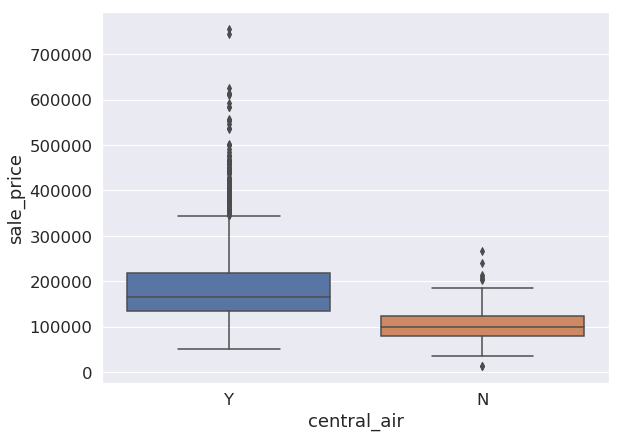

In [40]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='central_air', y='sale_price', data=df[['central_air', 'sale_price']]);

#### ANOVA Test

##### 1) Central Air Condition

In [42]:
mod1 = ols('sale_price ~ central_air', data=df).fit()
sm.stats.anova_lm(mod1)

,df,sum_sq,mean_sq,F,PR(>F)
central_air,1.0,1.307798e+12,1.307798e+12,220.263994,4.247468e-48
Residual,2928.0,1.738474e+13,5.937411e+09,NaN,NaN


##### 2) MS Zoning

In [43]:
df.ms_zoning.value_counts(normalize=True, dropna=False)

RL         0.775768
RM         0.157679
FV         0.047440
RH         0.009215
C (all)    0.008532
A (agr)    0.000683
I (all)    0.000683
Name: ms_zoning, dtype: float64

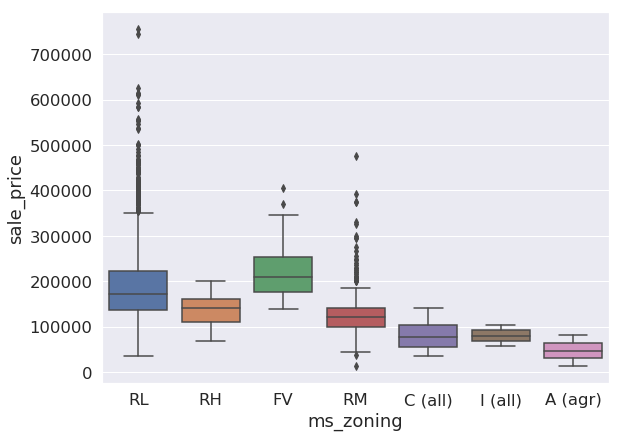

In [44]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='ms_zoning', y='sale_price', data=df[['ms_zoning', 'sale_price']]);

In [45]:
mod2 = ols('sale_price ~ ms_zoning', data=df).fit()
sm.stats.anova_lm(mod2)

,df,sum_sq,mean_sq,F,PR(>F)
ms_zoning,6.0,2.164685e+12,3.607808e+11,63.805169,1.100499e-74
Residual,2923.0,1.652785e+13,5.654414e+09,NaN,NaN


##### 3) Lot Shape

In [46]:
df.lot_shape.value_counts(normalize=True, dropna=False)

Reg    0.634471
IR1    0.334130
IR2    0.025939
IR3    0.005461
Name: lot_shape, dtype: float64

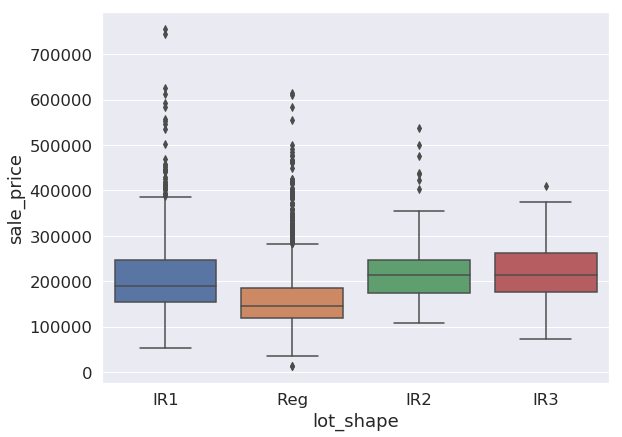

In [47]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='lot_shape', y='sale_price', data=df[['lot_shape', 'sale_price']]);

In [48]:
mod3= ols('sale_price ~ lot_shape', data=df).fit()
sm.stats.anova_lm(mod3)

,df,sum_sq,mean_sq,F,PR(>F)
lot_shape,3.0,1.713537e+12,5.711791e+11,98.431601,1.067863e-60
Residual,2926.0,1.697900e+13,5.802802e+09,NaN,NaN


In [49]:
df.lot_shape.replace({'Reg': 'Reg', 'IR1': 'IR' , 'IR2': 'IR' , "IR3": 'IR'}, inplace=True)
df.lot_shape.value_counts(normalize=True, dropna=False)

Reg    0.634471
IR     0.365529
Name: lot_shape, dtype: float64

In [50]:
mod3= ols('sale_price ~ lot_shape', data=df).fit()
sm.stats.anova_lm(mod3)

,df,sum_sq,mean_sq,F,PR(>F)
lot_shape,1.0,1.687504e+12,1.687504e+12,290.561783,3.407607e-62
Residual,2928.0,1.700503e+13,5.807730e+09,NaN,NaN


##### 4) Utilities

In [51]:
df.utilities.value_counts(normalize=True, dropna=False)

AllPub    0.998976
NoSewr    0.000683
NoSeWa    0.000341
Name: utilities, dtype: float64

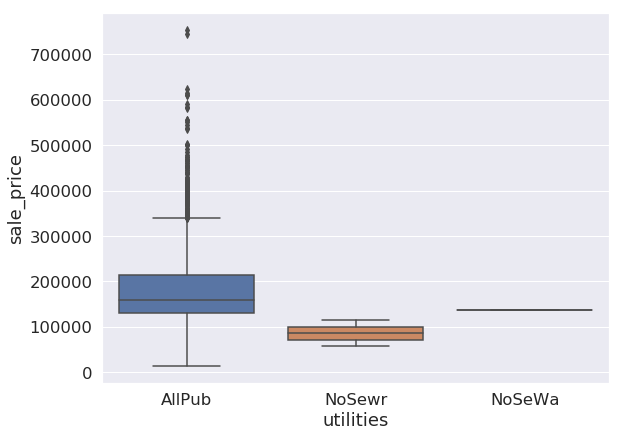

In [52]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='utilities', y='sale_price', data=df[['utilities', 'sale_price']]);

In [53]:
mod4= ols('sale_price ~ utilities', data=df).fit()
sm.stats.anova_lm(mod4)

,df,sum_sq,mean_sq,F,PR(>F)
utilities,2.0,1.974727e+10,9.873633e+09,1.547713,0.212908
Residual,2927.0,1.867279e+13,6.379498e+09,NaN,NaN


##### 5) Building Type

In [54]:
df.bldg_type.value_counts(normalize=True, dropna=False)

1Fam      0.827645
TwnhsE    0.079522
Duplex    0.037201
Twnhs     0.034471
2fmCon    0.021160
Name: bldg_type, dtype: float64

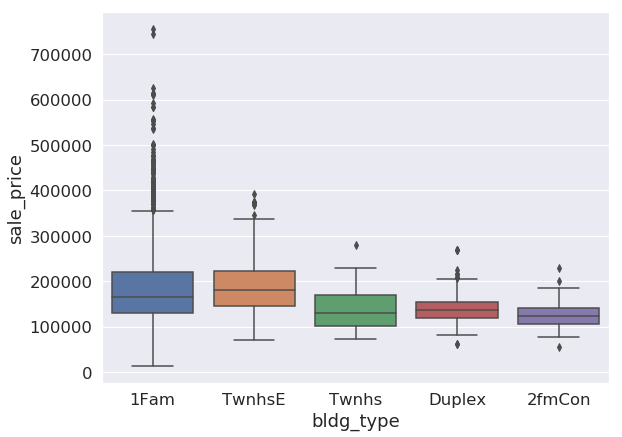

In [55]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='bldg_type', y='sale_price', data=df[['bldg_type', 'sale_price']]);

In [56]:
df.bldg_type.replace({'1Fam': 'Family', 'TwnhsE': 'TwnhsE' , 'Twnhs': 'Others' , 
                      "Duplex": 'Others', '2fmCon': 'Others'}, inplace=True)
df.bldg_type.value_counts(normalize=True, dropna=False)

Family    0.827645
Others    0.092833
TwnhsE    0.079522
Name: bldg_type, dtype: float64

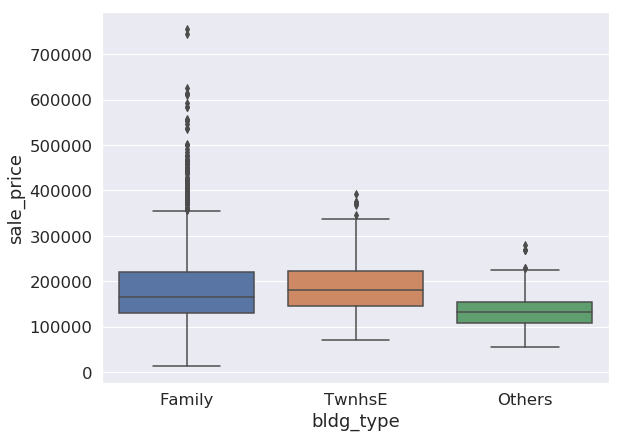

In [57]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='bldg_type', y='sale_price', data=df[['bldg_type', 'sale_price']]);

In [58]:
mod5= ols('sale_price ~ bldg_type', data=df).fit()
sm.stats.anova_lm(mod5)

,df,sum_sq,mean_sq,F,PR(>F)
bldg_type,2.0,6.373070e+11,3.186535e+11,51.658094,8.954587e-23
Residual,2927.0,1.805523e+13,6.168510e+09,NaN,NaN


##### 6) House Style

In [59]:
df.house_style.value_counts(normalize=True, dropna=False)

1Story    0.505461
2Story    0.297952
1.5Fin    0.107167
SLvl      0.043686
SFoyer    0.028328
2.5Unf    0.008191
1.5Unf    0.006485
2.5Fin    0.002730
Name: house_style, dtype: float64

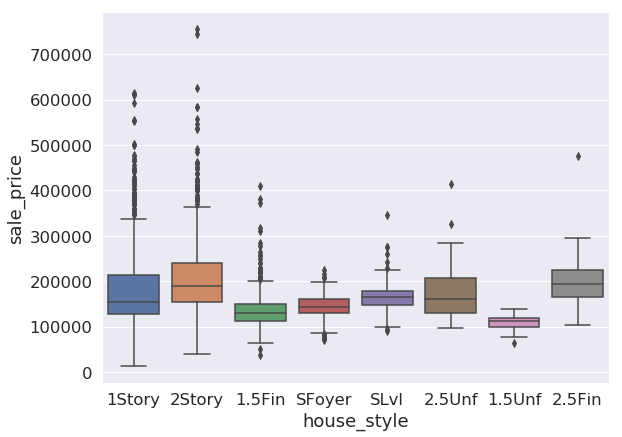

In [60]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='house_style', y='sale_price', data=df[['house_style', 'sale_price']]);

In [61]:
mod6= ols('sale_price ~ house_style', data=df).fit()
sm.stats.anova_lm(mod6)

,df,sum_sq,mean_sq,F,PR(>F)
house_style,7.0,1.447509e+12,2.067870e+11,35.038012,3.028710e-47
Residual,2922.0,1.724503e+13,5.901789e+09,NaN,NaN


##### 7) Foundation

In [62]:
df.foundation.value_counts(normalize=True, dropna=False)

PConc     0.447099
CBlock    0.424573
BrkTil    0.106143
Slab      0.016724
Stone     0.003754
Wood      0.001706
Name: foundation, dtype: float64

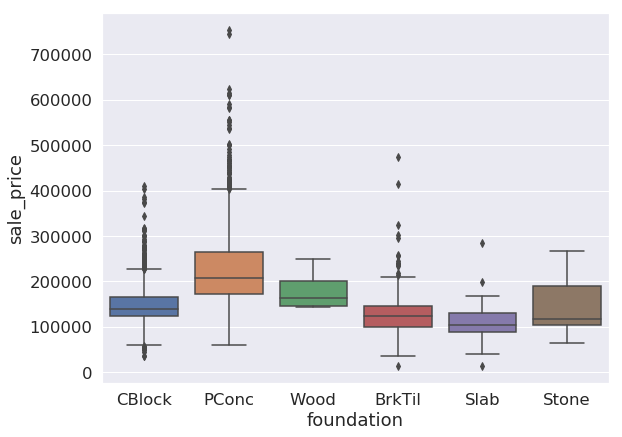

In [63]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='foundation', y='sale_price', data=df[['foundation', 'sale_price']]);

In [64]:
mod7= ols('sale_price ~ foundation', data=df).fit()
sm.stats.anova_lm(mod7)

,df,sum_sq,mean_sq,F,PR(>F)
foundation,5.0,5.236323e+12,1.047265e+12,227.567827,1.267124e-205
Residual,2924.0,1.345621e+13,4.601989e+09,NaN,NaN


##### 8) Basement Quality

In [65]:
df.bsmt_qual.value_counts(normalize=True, dropna=False)

TA     0.437884
Gd     0.416041
Ex     0.088055
Fa     0.030034
NaN    0.027304
Po     0.000683
Name: bsmt_qual, dtype: float64

In [66]:
df['bsmt_qual'] = np.where(df.bsmt_qual.isnull(), df.bsmt_qual.mode(), df.bsmt_qual)

In [67]:
df.bsmt_qual.value_counts(normalize=True, dropna=False)

TA    0.465188
Gd    0.416041
Ex    0.088055
Fa    0.030034
Po    0.000683
Name: bsmt_qual, dtype: float64

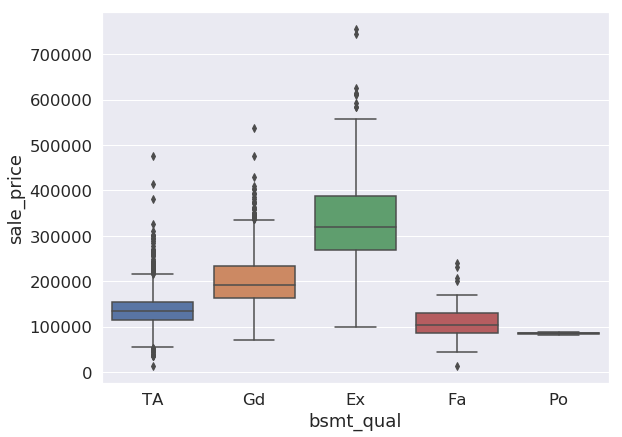

In [68]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='bsmt_qual', y='sale_price', data=df[['bsmt_qual', 'sale_price']]);

In [69]:
mod8= ols('sale_price ~ bsmt_qual', data=df).fit()
sm.stats.anova_lm(mod8)

,df,sum_sq,mean_sq,F,PR(>F)
bsmt_qual,4.0,9.508260e+12,2.377065e+12,757.04551,0.0
Residual,2925.0,9.184277e+12,3.139924e+09,NaN,NaN


In [70]:
df.bsmt_qual.replace({'TA': 'TA', 'Gd': 'Gd' , 'Ex': 'Ex' , 
                      "Fa": 'TA', 'Po': 'TA'}, inplace=True)

In [71]:
mod8= ols('sale_price ~ bsmt_qual', data=df).fit()
sm.stats.anova_lm(mod8)

,df,sum_sq,mean_sq,F,PR(>F)
bsmt_qual,2.0,9.436826e+12,4.718413e+12,1492.137498,0.0
Residual,2927.0,9.255712e+12,3.162184e+09,NaN,NaN


In [72]:
df.kitchen_qual.value_counts(normalize=True, dropna=False)


TA    0.509898
Gd    0.395904
Ex    0.069966
Fa    0.023891
Po    0.000341
Name: kitchen_qual, dtype: float64

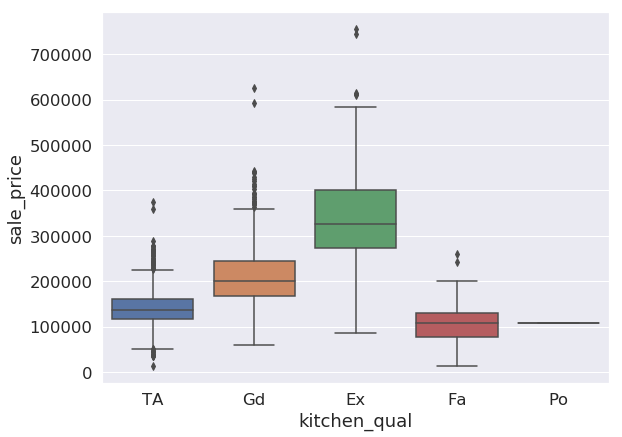

In [73]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='kitchen_qual', y='sale_price', data=df[['kitchen_qual', 'sale_price']]);

##### 9) Kitchen Quality

In [74]:
df.kitchen_qual.value_counts(normalize=True, dropna=False)

TA    0.509898
Gd    0.395904
Ex    0.069966
Fa    0.023891
Po    0.000341
Name: kitchen_qual, dtype: float64

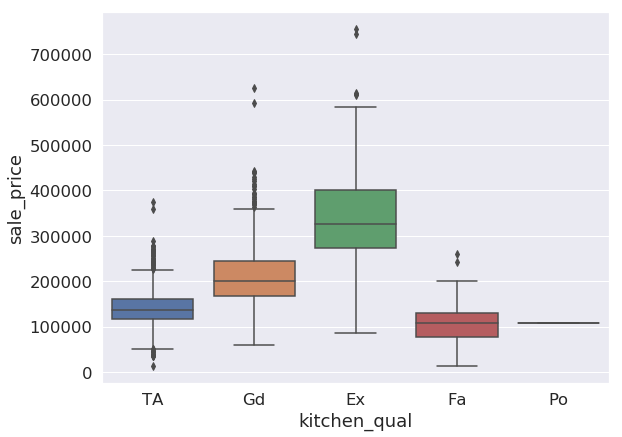

In [75]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='kitchen_qual', y='sale_price', data=df[['kitchen_qual', 'sale_price']]);

In [76]:
df.kitchen_qual.replace({'TA': 'TA', 'Gd': 'Gd' , 'Ex': 'Ex' , 
                      "Fa": 'TA', 'Po': 'TA'}, inplace=True)

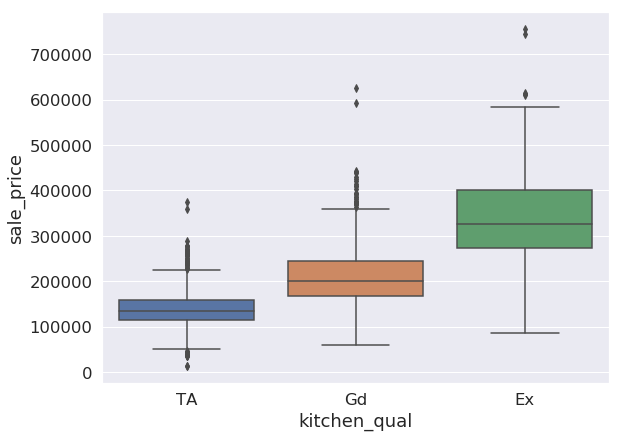

In [77]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='kitchen_qual', y='sale_price', data=df[['kitchen_qual', 'sale_price']]);

In [78]:
mod9= ols('sale_price ~ kitchen_qual', data=df).fit()
sm.stats.anova_lm(mod9)

,df,sum_sq,mean_sq,F,PR(>F)
kitchen_qual,2.0,8.933439e+12,4.466720e+12,1339.681991,0.0
Residual,2927.0,9.759098e+12,3.334164e+09,NaN,NaN


##### Whether Kitchen Quality and Basement Quality Correlated Each other??? If So how you identify it??
![](img/ques_confuse.jpg)

### CHI-SQUARE Test

In [79]:
contingency_table = pd.crosstab(
    df.bsmt_qual,
    df.kitchen_qual,
    margins = True
)
contingency_table

kitchen_qual,Ex,Gd,TA,All
bsmt_qual,,,,
Ex,138,104,16,258
Gd,43,806,370,1219
TA,24,250,1179,1453
All,205,1160,1565,2930


In [80]:
f_obs = np.array([contingency_table.iloc[0][0:3].values,
                  contingency_table.iloc[1][0:3].values,
                  contingency_table.iloc[2][0:3].values])
f_obs

array([[ 138,  104,   16],
       [  43,  806,  370],
       [  24,  250, 1179]])

In [81]:
stats.chi2_contingency(f_obs)[0:3]

(1716.1767681944539, 0.0, 4)

##### 10) Year Sold - Dropped

In [82]:
df.yr_sold.value_counts()

2007    694
2009    648
2006    625
2008    622
2010    341
Name: yr_sold, dtype: int64

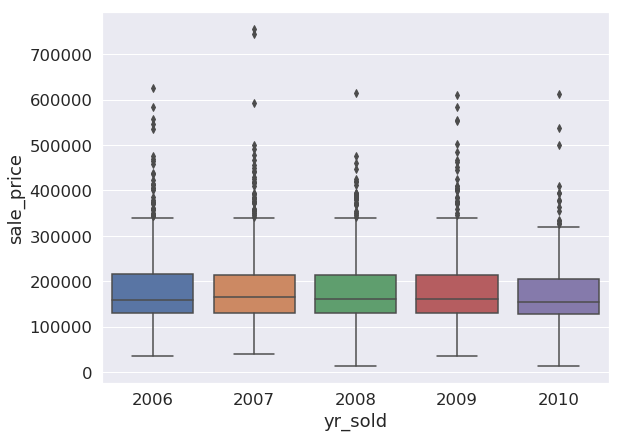

In [83]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); sns.boxplot(x='yr_sold', y='sale_price', data=df[['yr_sold', 'sale_price']]);

##### 11) Condition

In [84]:
df.condition_1.value_counts(normalize=True, dropna=False)

Norm      0.860751
Feedr     0.055973
Artery    0.031399
RRAn      0.017065
PosN      0.013311
RRAe      0.009556
PosA      0.006826
RRNn      0.003072
RRNe      0.002048
Name: condition_1, dtype: float64

In [85]:
df.condition_2.value_counts(normalize=True, dropna=False)

Norm      0.989761
Feedr     0.004437
Artery    0.001706
PosN      0.001365
PosA      0.001365
RRNn      0.000683
RRAn      0.000341
RRAe      0.000341
Name: condition_2, dtype: float64

In [86]:
df[['condition_1', 'condition_2']].head()

,condition_1,condition_2
pid,,
526301100,Norm,Norm
526350040,Feedr,Norm
526351010,Norm,Norm
526353030,Norm,Norm
527105010,Norm,Norm


In [87]:
df['condition_3'] = np.where(df.condition_1 == df.condition_2, np.nan, df.condition_2)
df[['condition_1', 'condition_2', 'condition_3']].head()

,condition_1,condition_2,condition_3
pid,,,
526301100,Norm,Norm,NaN
526350040,Feedr,Norm,Norm
526351010,Norm,Norm,NaN
526353030,Norm,Norm,NaN
527105010,Norm,Norm,NaN


In [88]:
df['cond']= np.where(df.condition_3.isnull(), df.condition_1, df.condition_1 + '|' + df.condition_3)
df.cond.head()

pid
526301100          Norm
526350040    Feedr|Norm
526351010          Norm
526353030          Norm
527105010          Norm
Name: cond, dtype: object

In [89]:
cond = df.cond.str.get_dummies('|').copy()

In [90]:
drop_cols = ['utilities', 'condition_1', 'condition_2',  'condition_3',  'cond', 'yr_sold', 'central_air_num']

In [91]:
df.drop(drop_cols, axis=1, inplace=True)

In [92]:
df_final = df.merge(cond, left_index=True, right_index=True)

In [93]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 526301100 to 924151050
Data columns (total 23 columns):
ms_zoning           2930 non-null object
lot_shape           2930 non-null object
bldg_type           2930 non-null object
house_style         2930 non-null object
overall_qual        2930 non-null int64
year_built          2930 non-null int64
year_remod_add      2930 non-null int64
foundation          2930 non-null object
bsmt_qual           2930 non-null object
central_air         2930 non-null object
kitchen_qual        2930 non-null object
sale_price          2930 non-null int64
lot_area_upper      2930 non-null float64
first_second_flr    2930 non-null int64
Artery              2930 non-null int64
Feedr               2930 non-null int64
Norm                2930 non-null int64
PosA                2930 non-null int64
PosN                2930 non-null int64
RRAe                2930 non-null int64
RRAn                2930 non-null int64
RRNe                2930 non-n

##### Converting Dummies Variables

In [94]:
df_final = pd.get_dummies(df_final)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 526301100 to 924151050
Data columns (total 49 columns):
overall_qual          2930 non-null int64
year_built            2930 non-null int64
year_remod_add        2930 non-null int64
sale_price            2930 non-null int64
lot_area_upper        2930 non-null float64
first_second_flr      2930 non-null int64
Artery                2930 non-null int64
Feedr                 2930 non-null int64
Norm                  2930 non-null int64
PosA                  2930 non-null int64
PosN                  2930 non-null int64
RRAe                  2930 non-null int64
RRAn                  2930 non-null int64
RRNe                  2930 non-null int64
RRNn                  2930 non-null int64
ms_zoning_A (agr)     2930 non-null uint8
ms_zoning_C (all)     2930 non-null uint8
ms_zoning_FV          2930 non-null uint8
ms_zoning_I (all)     2930 non-null uint8
ms_zoning_RH          2930 non-null uint8
ms_zoning_RL          2930 non-null ui

In [95]:
df_final.columns

Index(['overall_qual', 'year_built', 'year_remod_add', 'sale_price',
       'lot_area_upper', 'first_second_flr', 'Artery', 'Feedr', 'Norm', 'PosA',
       'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn', 'ms_zoning_A (agr)',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'lot_shape_IR',
       'lot_shape_Reg', 'bldg_type_Family', 'bldg_type_Others',
       'bldg_type_TwnhsE', 'house_style_1.5Fin', 'house_style_1.5Unf',
       'house_style_1Story', 'house_style_2.5Fin', 'house_style_2.5Unf',
       'house_style_2Story', 'house_style_SFoyer', 'house_style_SLvl',
       'foundation_BrkTil', 'foundation_CBlock', 'foundation_PConc',
       'foundation_Slab', 'foundation_Stone', 'foundation_Wood',
       'bsmt_qual_Ex', 'bsmt_qual_Gd', 'bsmt_qual_TA', 'central_air_N',
       'central_air_Y', 'kitchen_qual_Ex', 'kitchen_qual_Gd',
       'kitchen_qual_TA'],
      dtype='object')

In [96]:
cols_ord = ['overall_qual', 'year_built', 'year_remod_add', 
       'lot_area_upper', 'first_second_flr', 'Artery',
       'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn',
       'ms_zoning_A (agr)', 'ms_zoning_C (all)', 'ms_zoning_FV',
       'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM',
       'lot_shape_IR', 'lot_shape_Reg', 'bldg_type_Family', 'bldg_type_Others',
       'bldg_type_TwnhsE', 'house_style_1.5Fin', 'house_style_1.5Unf',
       'house_style_1Story', 'house_style_2.5Fin', 'house_style_2.5Unf',
       'house_style_2Story', 'house_style_SFoyer', 'house_style_SLvl',
       'foundation_BrkTil', 'foundation_CBlock', 'foundation_PConc',
       'foundation_Slab', 'foundation_Stone', 'foundation_Wood',
       'bsmt_qual_Ex', 'bsmt_qual_Gd', 'bsmt_qual_TA', 'central_air_N',
       'central_air_Y', 'kitchen_qual_Ex', 'kitchen_qual_Gd',
        'kitchen_qual_TA', 'sale_price']

In [97]:
df_final = df_final[cols_ord].copy()

# Building Model

In [98]:
df_final.head()

,overall_qual,year_built,year_remod_add,lot_area_upper,first_second_flr,Artery,Feedr,Norm,PosA,PosN,...,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Gd,bsmt_qual_TA,central_air_N,central_air_Y,kitchen_qual_Ex,kitchen_qual_Gd,kitchen_qual_TA,sale_price
pid,,,,,,,,,,,,,,,,,,,,,
526301100,6,1960,1960,17727.75,1656,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,215000
526350040,5,1961,1961,11622.00,896,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,105000
526351010,6,1958,1958,14267.00,1329,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,172000
526353030,7,1968,1968,11160.00,2110,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,244000
527105010,5,1997,1998,13830.00,1629,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,189900


In [ ]:
X = df_final.iloc[:, 0:-1].values
y = df_final.iloc[:, -1].values

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [ ]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

#### Base Model

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test) 

In [ ]:
print("R2 Training Score for the Baseline Model:", np.round(r2_score(y_train, y_pred_train),2))

print("R2 Test Score for the Baseline Model:", np.round(r2_score(y_test, y_pred_test),2))


In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print('___________________________')
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

#### Ridge Model

In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


In [ ]:
ridge10 = Ridge(alpha=2).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

#### Lasso

In [ ]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

In [ ]:
param_grid = {'alpha': [10, 50, 75, 90, 100, 150, 500, 1000],
'max_iter': [500, 700, 1000, 2000, 3000]}
print("Parameter grid:\n{}".format(param_grid))

In [ ]:
grid_search = GridSearchCV(Lasso(), param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
y_pred_test = grid_search.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print('___________________________')
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))